# Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System

This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding

In [21]:
# import libraries
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read information from csv file
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
# import data
df = pd.read_csv('./data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [4]:
df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.3,29.3,NaN,NaN,25.7,33.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
1,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.7,32.7,NaN,NaN,31.9,33.5,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR


In [5]:
df.shape

(76393, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76393 entries, 0 to 76392
Data columns (total 33 columns):
YearStart                     76393 non-null int64
YearEnd                       76393 non-null int64
LocationAbbr                  76393 non-null object
LocationDesc                  76393 non-null object
Datasource                    76393 non-null object
Class                         76393 non-null object
Topic                         76393 non-null object
Question                      76393 non-null object
Data_Value_Unit               0 non-null float64
Data_Value_Type               76393 non-null object
Data_Value                    68847 non-null float64
Data_Value_Alt                68847 non-null float64
Data_Value_Footnote_Symbol    7546 non-null object
Data_Value_Footnote           7546 non-null object
Low_Confidence_Limit          68847 non-null float64
High_Confidence_Limit         68847 non-null float64
Sample_Size                   68847 non-null float64
Total    

In [7]:
df.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,     0, 76393,
           0,  7546,  7546, 68847, 68847,  7546,  7546,  7546, 73665,
       60025, 65481, 70937, 57297, 54569,  1428,     0,     0,     0,
           0,     0,     9,     9,     9,     9])

In [8]:
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))
sum_ = pd.DataFrame(df.dtypes, columns=['dtypes'])
sum_ = sum_.reset_index()
sum_['Name'] = sum_['index']
sum_ = sum_[['Name', 'dtypes']]
sum_['Missing'] = df.isnull().sum().values
sum_['Missing_%'] = sum_['Missing']/df.shape[0]*100
sum_['Uniques'] = df.nunique().values
sum_['First Row'] = df.loc[0].values
sum_['Last Row'] = df.loc[df.shape[0]-1].values

Number of rows: 76393, number of columns: 33


In [9]:
sum_

,Name,dtypes,Missing,Missing_%,Uniques,First Row,Last Row
0,YearStart,int64,0,0.000000,9,2014,2019
1,YearEnd,int64,0,0.000000,9,2014,2019
2,LocationAbbr,object,0,0.000000,55,GU,MO
3,LocationDesc,object,0,0.000000,55,Guam,Missouri
4,Datasource,object,0,0.000000,1,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System
5,Class,object,0,0.000000,3,Obesity / Weight Status,Fruits and Vegetables
6,Topic,object,0,0.000000,3,Obesity / Weight Status,Fruits and Vegetables - Behavior
7,Question,object,0,0.000000,9,Percent of adults aged 18 years and older who ...,Percent of adults who report consuming fruit l...
8,Data_Value_Unit,float64,76393,100.000000,0,NaN,NaN
9,Data_Value_Type,object,0,0.000000,1,Value,Value


In [10]:
df.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1)

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2014,GU,Guam,Percent of adults aged 18 years and older who ...,29.3,29.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",66,Education,High school graduate
1,2013,US,National,Percent of adults aged 18 years and older who ...,28.8,28.8,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,59,Income,"$50,000 - $74,999"
2,2013,US,National,Percent of adults aged 18 years and older who ...,32.7,32.7,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,59,Income,Data not reported
3,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,26.6,30904.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,59,Income,"Less than $15,000"
4,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,27.4,125.0,NaN,NaN,NaN,NaN,NaN,Hispanic,"(13.444304, 144.793731)",66,Race/Ethnicity,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76388,2019,MI,Michigan,Percent of adults who report consuming fruit l...,43.2,43.2,1440.0,NaN,45 - 54,NaN,NaN,NaN,NaN,"(44.6613195430005, -84.71439026999968)",26,Age (years),45 - 54
76389,2019,WI,Wisconsin,Percent of adults who report consuming vegetab...,19.7,19.7,1027.0,NaN,55 - 64,NaN,NaN,NaN,NaN,"(44.39319117400049, -89.81637074199966)",55,Age (years),55 - 64
76390,2019,NE,Nebraska,Percent of adults who report consuming fruit l...,41.1,41.1,874.0,NaN,18 - 24,NaN,NaN,NaN,NaN,"(41.6410409880005, -99.36572062299967)",31,Age (years),18 - 24
76391,2019,TX,Texas,Percent of adults who report consuming fruit l...,43.7,43.7,2897.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(31.827240407000488, -99.42677020599967)",48,Education,Some college or technical school


In [11]:
#Create separate Dataform from df by gender df2, by education level dfedu, and by income dfedu

df2=df[(df['Stratification1']=='Male')|(df['Stratification1']=='Female')]
dfedu=df[df['StratificationCategory1']=='Education']
dfinc=df[df['StratificationCategory1']=='Income']

#reset index for each of the new dataforms

df2 = df2.reset_index(drop = True)
dfedu = dfedu.reset_index(drop = True)
dfinc = dfinc.reset_index(drop = True)

In [12]:
df2.shape

(5456, 33)

In [13]:
dfedu.shape

(10912, 33)

In [14]:
dfinc.shape

(19096, 33)

In [15]:
df2['Question'].unique()

array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 mi

In [16]:
X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']


df2=df2[df2['Question']==X[0]]

In [17]:
df2

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
2,2016,2016,NY,New York,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,25.9,25.9,NaN,NaN,24.5,27.3,14316.0,NaN,NaN,NaN,Male,NaN,NaN,"(42.827001032, -75.543970427)",OWS,OWS1,Q036,VALUE,36,Gender,Male,GEN,MALE
5,2016,2016,NH,New Hampshire,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,26.6,26.6,NaN,NaN,24.4,28.9,2732.0,NaN,NaN,NaN,Male,NaN,NaN,"(43.655950113, -71.50036092)",OWS,OWS1,Q036,VALUE,33,Gender,Male,GEN,MALE
6,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.1,29.1,NaN,NaN,28.7,29.5,176407.0,NaN,NaN,NaN,Male,NaN,NaN,NaN,OWS,OWS1,Q036,VALUE,59,Gender,Male,GEN,MALE
7,2017,2017,HI,Hawaii,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,25.1,25.1,NaN,NaN,23.2,27.1,3529.0,NaN,NaN,NaN,Male,NaN,NaN,"(21.304850435, -157.857749403)",OWS,OWS1,Q036,VALUE,15,Gender,Male,GEN,MALE
8,2016,2016,OK,Oklahoma,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.3,33.3,NaN,NaN,30.9,35.6,2710.0,NaN,NaN,NaN,Male,NaN,NaN,"(35.472031356, -97.521070214)",OWS,OWS1,Q036,VALUE,40,Gender,Male,GEN,MALE
9,2016,2016,FL,Florida,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,26.6,26.6,NaN,NaN,25.2,28.1,18545.0,NaN,NaN,NaN,Female,NaN,NaN,"(28.932040377, -81.928960539)",OWS,OWS1,Q036,VALUE,12,Gender,Female,GEN,FEMALE
11,2017,2017,MT,Montana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,27.2,27.2,NaN,NaN,25.0,29.5,2658.0,NaN,NaN,NaN,Male,NaN,NaN,"(47.066528972, -109.424420645)",OWS,OWS1,Q036,VALUE,30,Gender,Male,GEN,MALE
15,2016,2016,OK,Oklahoma,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.2,32.2,NaN,NaN,30.2,34.3,3739.0,NaN,NaN,NaN,Female,NaN,NaN,"(35.472031356, -97.521070214)",OWS,OWS1,Q036,VALUE,40,Gender,Female,GEN,FEMALE
16,2016,2016,ND,North Dakota,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.2,32.2,NaN,NaN,30.1,34.4,2541.0,NaN,NaN,NaN,Male,NaN,NaN,"(47.475319779, -100.118421049)",OWS,OWS1,Q036,VALUE,38,Gender,Male,GEN,MALE
17,2016,2016,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.9,29.9,NaN,NaN,27.5,32.4,2507.0,NaN,NaN,NaN,Female,NaN,NaN,"(44.393191174, -89.816370742)",OWS,OWS1,Q036,VALUE,55,Gender,Female,GEN,FEMALE


In [18]:
df2=df2[df2['YearStart']==2014]

#separate out national so that we can calculate the national obesity rate for 2014
df2n=df2[(df2['LocationDesc']=='National')]

#Cut out terriotories that our not included within 50 states + DC data
df2=df2[~(df2['LocationDesc']=='National')]
df2=df2[~(df2['LocationDesc']=='Guam')]
df2=df2[~(df2['LocationDesc']=='Puerto Rico')]
df2['LocationDesc'].unique()

array(['Arizona', 'Virginia', 'Kentucky', 'Nebraska', 'Maryland',
       'Louisiana', 'New Hampshire', 'Kansas', 'Arkansas',
       'District of Columbia', 'Vermont', 'Tennessee', 'North Carolina',
       'Montana', 'Ohio', 'Alabama', 'New York', 'New Mexico', 'Michigan',
       'Hawaii', 'Texas', 'Connecticut', 'California', 'Delaware',
       'Indiana', 'Iowa', 'Pennsylvania', 'Mississippi', 'Oklahoma',
       'New Jersey', 'Massachusetts', 'Missouri', 'Washington', 'Nevada',
       'Utah', 'Wisconsin', 'Wyoming', 'Idaho', 'Florida', 'North Dakota',
       'Georgia', 'Oregon', 'Illinois', 'Rhode Island', 'West Virginia',
       'Maine', 'Alaska', 'South Carolina', 'South Dakota', 'Minnesota',
       'Colorado'], dtype=object)

In [19]:
sorted_df = df2.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df = sorted_df.groupby('LocationDesc', as_index=False).mean()

#calculate the average (over men and women) obesity rate for the country

natmeanobesity2014=sum(df2n['Data_Value'])/len(df2n)
print(natmeanobesity2014)

28.9


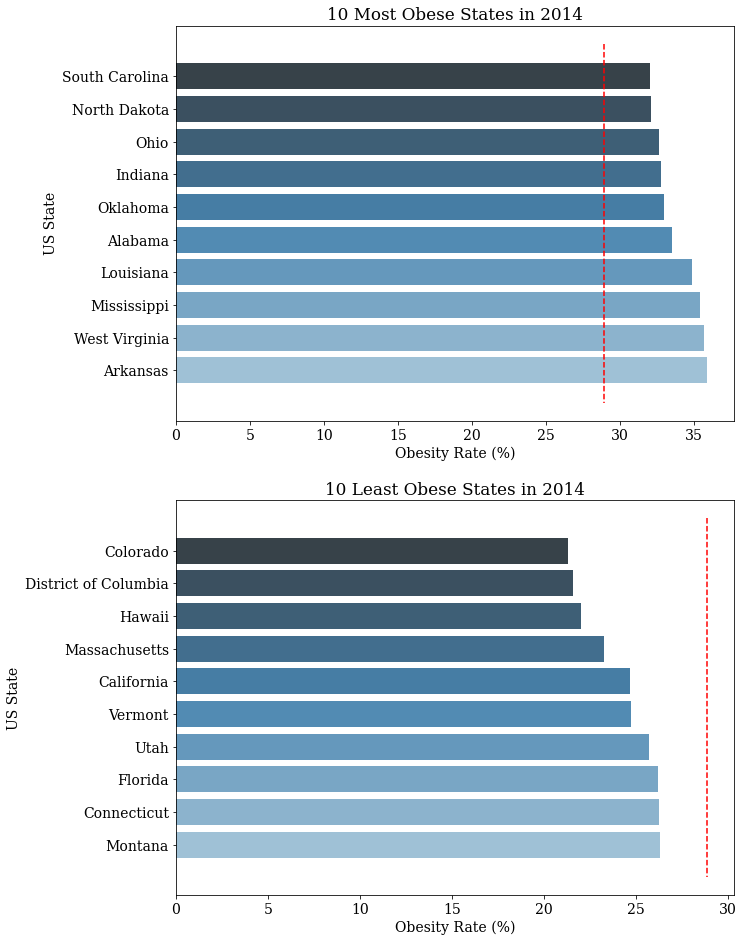

In [22]:
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_df = sorted_df.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_df.tail(10).LocationDesc,x=sorted_df.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_df.head(10).LocationDesc,x=sorted_df.head(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')

In [24]:
ledu=dfedu.Education.unique()


#want to treat education levels as dummy variables, so this assigns 1 or 0 depending on the group
for i in ledu:
    dfedu[i]=dfedu['Education'].apply(lambda x: int(x==i))


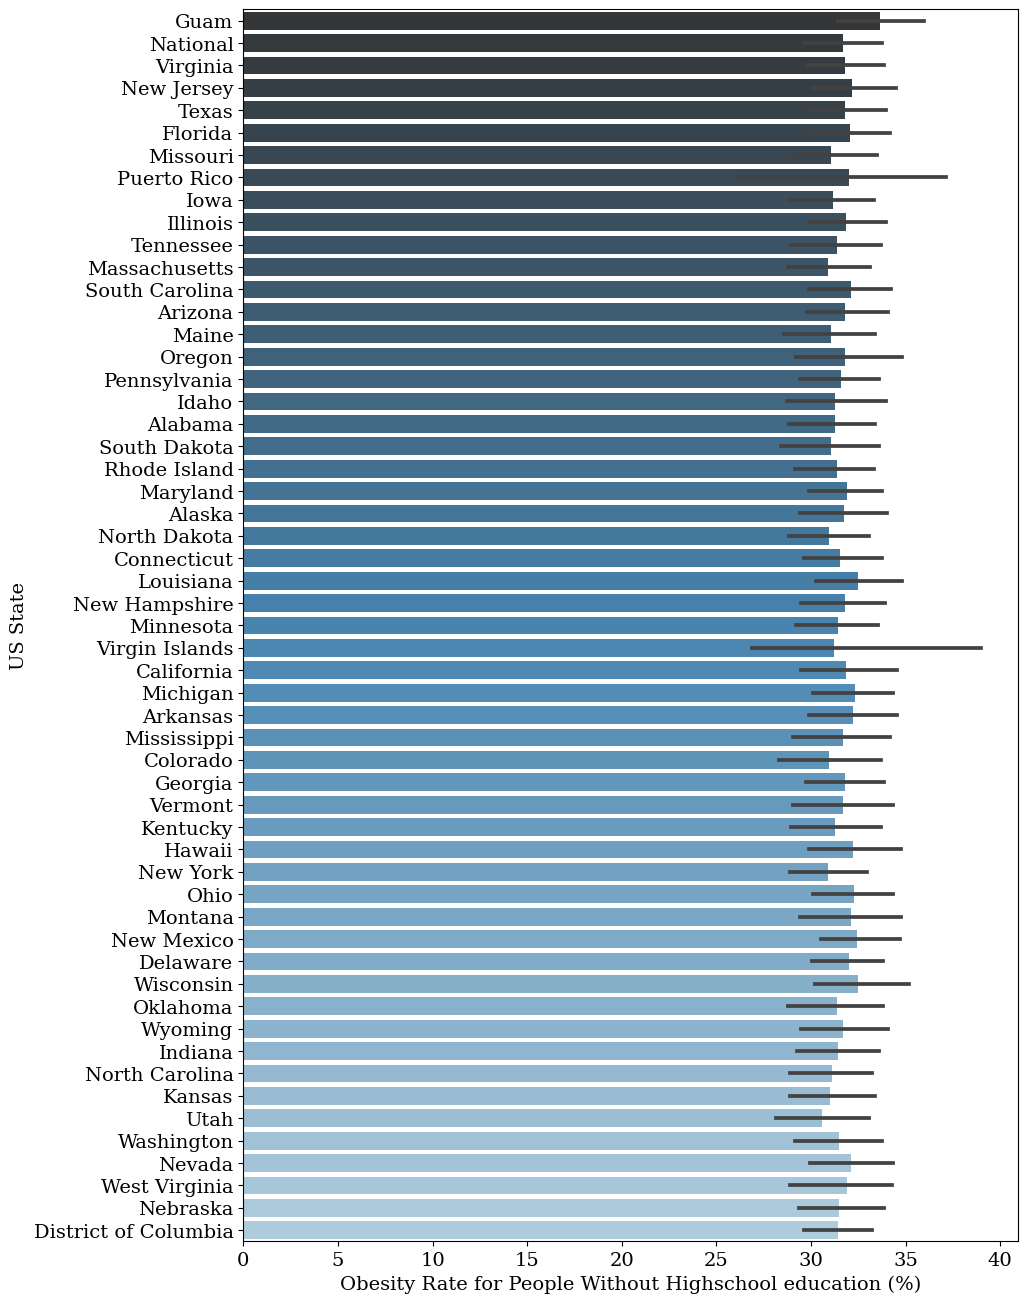

In [25]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})



dfeduLHS=dfedu[dfedu[ledu[0]]==1]
dfeduLHS = dfeduLHS.reset_index(drop = True)

plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfeduLHS.LocationDesc,x=dfeduLHS.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People Without Highschool education (%)')

plt.show()